In [3]:
pip install numpy-stl

küpler

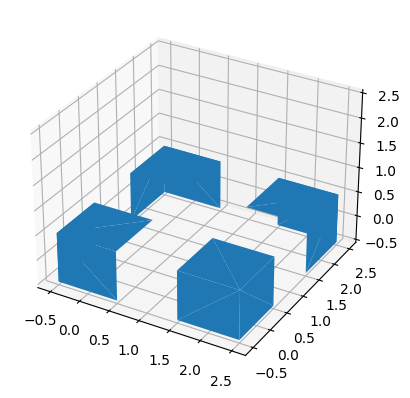

In [8]:
from stl import mesh
import math
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2


# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [ ]:
küp

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

<ipython-input-10-16f676c05985>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.ones(axes, dtype=np.bool)


{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7842b01daec0>}

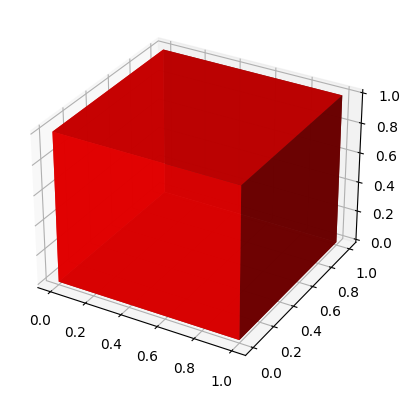

In [10]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Create axis
axes = [1, 1, 1]

# Create Data
data = np.ones(axes, dtype=np.bool)

# Control Transparency
alpha = 0.9

# Control colour
colors = np.empty(axes + [4], dtype=np.float32)

colors[:] = [1, 0, 0, alpha] # red

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)


Yuvarlak oluşturmak

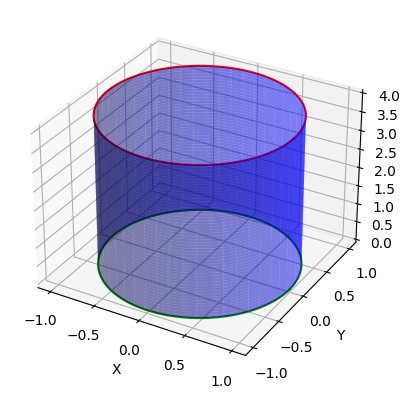

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def create_cylinder(length, radius, num_points=100):
    # Create the points for the side surface of the cylinder
    theta = np.linspace(0, 2 * np.pi, num_points)
    z = np.linspace(0, length, num_points)
    Z, Theta = np.meshgrid(z, theta)
    X = radius * np.cos(Theta)
    Y = radius * np.sin(Theta)

    # Create the points for the two circular faces of the cylinder
    circle_points = num_points
    theta = np.linspace(0, 2 * np.pi, circle_points)
    x_top = radius * np.cos(theta)
    y_top = radius * np.sin(theta)
    x_bottom = x_top
    y_bottom = y_top

    # Plot the cylinder
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, color='b', alpha=0.5)  # Side surface
    ax.plot(x_top, y_top, np.full_like(x_top, length), color='r')  # Top face
    ax.plot(x_bottom, y_bottom, np.zeros_like(x_bottom), color='g')  # Bottom face

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Example usage:
create_cylinder(length=4, radius=1)